# Discrete-Time Systems (vervolg)
1. Input-output modellen (§2.6)
2. z-transformatie (§2.7)
3. Polen en nulpunten (§2.8)
4. Keuze van bemonsteringsfrequentie (sampling rate) (§2.9)

<IPython.core.display.Javascript object>


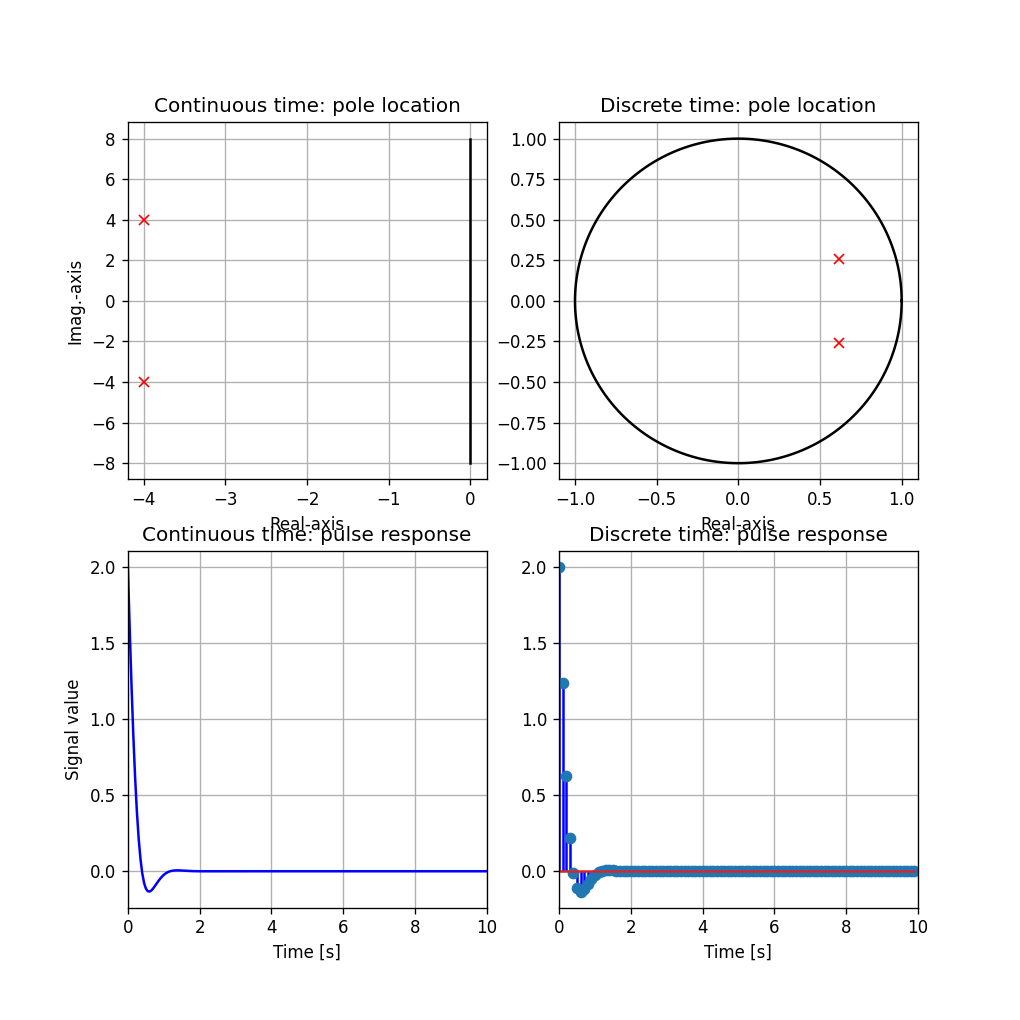

In [1]:
from cmath import exp # need cmath to do math with complex numbers
import numpy as np
from numpy.linalg import eig
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook
matplotlib.rcParams['figure.figsize'] = [8.5, 8.5]

# sampling time:
h = 0.1   # what if h small (<<1) and what if h large (h>>1)?

# continuous time poles
#lambda1 = -1.+1*np.pi/h*1j                       # what if real(lambda1) < 0 or = 0 or > 0? why?
                                          # what if imag(lambda1)*h is 0, or pi/2 or pi ?
lambda1 = -4+ 4j
lambda2 = lambda1.real - lambda1.imag*1j  # choose to be complex conjugate of lambda1

# discrete time poles
lambda_d1 = exp(lambda1*h)
lambda_d2 = exp(lambda2*h)

# response continuous time:
tend = 10.
tc = np.linspace(0,tend,200)
k = np.arange(0,tend/h,1)
xc = np.real(np.exp(lambda1*tc)+np.exp(lambda2*tc))
xd = np.real(lambda_d1**k+lambda_d2**k)

plt.subplot(221)
plt.plot([lambda1.real,lambda2.real],[lambda1.imag,lambda2.imag],'rx')
plt.title('Continuous time: pole location')
plt.ylabel('Imag.-axis')
plt.xlabel('Real-axis')
plt.plot([0,0],[-2*max(.5,abs(lambda1.imag)),2*max(.5,abs(lambda1.imag))],'k')
plt.grid()
plt.subplot(222)
plt.plot([lambda_d1.real,lambda_d2.real],[lambda_d1.imag,lambda_d2.imag],'rx')
plt.title('Discrete time: pole location')
#plt.ylabel('Imag.-axis')
plt.xlabel('Real-axis')
circle = np.array([[np.cos(t), np.sin(t)] for t in np.linspace(0,2*np.pi,200)])
plt.plot(circle[:,0],circle[:,1],'k')
plt.grid()

plt.subplot(223)
plt.plot(tc,xc,'b-')
plt.title('Continuous time: pulse response')
plt.ylabel('Signal value')
plt.xlabel('Time [s]')
plt.xlim([-0.01,tend])
plt.grid()

plt.subplot(224)
plt.stem(k*h,xd,'b-')
plt.title('Discrete time: pulse response')
#plt.ylabel('Signal value')
plt.xlabel('Time [s]')
plt.xlim([-0.01,tend])
plt.grid()